# Notes
- Just working with the healthcare provider data and trying to put it into one multi-data bar graph
- format for prettier p-value: 

pop_top_dentist = top_dentist['Dentist Rate']
pop_bottom_dentist = bottom_dentist['Dentist Rate']
ttest_dentist = stats.ttest_ind(pop_top_dentist, pop_bottom_dentist, equal_var=False)

if ttest_dentist[1] <0.001:
    pvalue_dentist = '{0:.1e}'.format(ttest_dentist[1])
else:
    pvalue_dentist = '{0:.3f}'.format(ttest_dentist[1])
pvalue_dentist

In [1]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
# Get counties
top_county_file = "../Zillow CSV results/top_counties_Median_Sale_Price.csv"
top_county_df = pd.read_csv(top_county_file, encoding="latin")
bottom_county_file = "../Zillow CSV results/bottom_counties_Median_Sale_Price.csv"
bottom_county_df = pd.read_csv(bottom_county_file, encoding="latin")

In [3]:
# Clean up counties (Top)
top_county_df["StateName"] = top_county_df["StateName"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})

top_county_df['RegionName'] = top_county_df['RegionName'].str.replace(" County", "")
top_county_df['County'] = top_county_df['RegionName'] + ", " + top_county_df['StateName']

top_county_clean = top_county_df[['County']]
top_county_clean = top_county_clean.iloc[::-1].reset_index(drop=True)
top_county_clean.head()

,County
0,"Suffolk, MA"
1,"San Luis Obispo, CA"
2,"Ventura, CA"
3,"Arlington, VA"
4,"King, WA"


In [4]:
# Clean up counties (Bottom)

bottom_county_df["StateName"] = bottom_county_df["StateName"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})

bottom_county_df['RegionName'] = bottom_county_df['RegionName'].str.replace(" County", "")
bottom_county_df['County'] = bottom_county_df['RegionName'] + ", " + bottom_county_df['StateName']

bottom_county_clean = bottom_county_df[['County']]

In [5]:
# Get health factor data and clean up
health_factor_path = "../raw data/2018_all_county_data_1.csv"
health_factor_df = pd.read_csv(health_factor_path, encoding="latin")

health_factor_df["State"] = health_factor_df["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df['County'] = health_factor_df["County"] + ", " + health_factor_df["State"]

# PCP Rate
primary care physician per 100,000 population

In [6]:
# Get specific health factor data
PCP_rate = health_factor_df[["County", "PCP Rate"]]
PCP_rate.head()

,County,PCP Rate
0,"Autauga, AL",45.0
1,"Baldwin, AL",73.0
2,"Barbour, AL",42.0
3,"Bibb, AL",53.0
4,"Blount, AL",21.0


In [7]:
# Make merge for plotting
top_PCP = pd.merge(top_county_clean, PCP_rate, on='County', how='left')
bottom_PCP = pd.merge(bottom_county_clean, PCP_rate, on='County', how='left')
all_PCP = pd.merge(bottom_PCP, top_PCP, on=['County','PCP Rate'],how='outer')
all_PCP

,County,PCP Rate
0,"Putnam, FL",42.0
1,"Richmond, NC",42.0
2,"Carroll, TN",50.0
3,"Shiawassee, MI",44.0
4,"Montgomery, KS",33.0
5,"Weakley, TN",65.0
6,"Macoupin, IL",28.0
7,"Knox, IL",66.0
8,"Clayton, GA",28.0
9,"Genesee, MI",91.0


<BarContainer object of 20 artists>

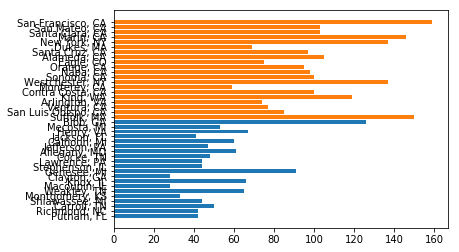

In [8]:
# Plot
plt.barh(bottom_PCP['County'], bottom_PCP['PCP Rate'])
plt.barh(top_PCP['County'], top_PCP['PCP Rate'])

In [9]:
# Run t-test
pop_top_PCP = top_PCP['PCP Rate']
pop_bottom_PCP = bottom_PCP['PCP Rate']
ttest_PCP = stats.ttest_ind(pop_top_PCP, pop_bottom_PCP, equal_var=False)

# Get p-value clean
if ttest_PCP[1] <0.001:
    pvalue_PCP = '{0:.1e}'.format(ttest_PCP[1])
else:
    pvalue_PCP = '{0:.3f}'.format(ttest_PCP[1])
pvalue_PCP

'4.0e-07'

# Dentist Rate
dentist per 100,000 population

In [10]:
# Get specific health factor data

dentist_rate_df = health_factor_df[["County", "Dentist Rate"]]
dentist_rate_df.head()

,County,Dentist Rate
0,"Autauga, AL",32.0
1,"Baldwin, AL",49.0
2,"Barbour, AL",35.0
3,"Bibb, AL",22.0
4,"Blount, AL",19.0


In [11]:
# Make merge for plotting
top_dentist = pd.merge(top_county_clean, dentist_rate_df, on='County', how='left')
bottom_dentist = pd.merge(bottom_county_clean, dentist_rate_df, on='County', how='left')
all_dentist = pd.merge(bottom_dentist, top_dentist, on=['County','Dentist Rate'],how='outer')
all_dentist

,County,Dentist Rate
0,"Putnam, FL",29.0
1,"Richmond, NC",31.0
2,"Carroll, TN",25.0
3,"Shiawassee, MI",44.0
4,"Montgomery, KS",55.0
5,"Weakley, TN",27.0
6,"Macoupin, IL",37.0
7,"Knox, IL",35.0
8,"Clayton, GA",27.0
9,"Genesee, MI",72.0


<BarContainer object of 20 artists>

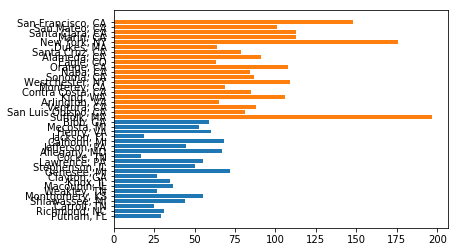

In [12]:
# Plot

plt.barh(bottom_dentist['County'], bottom_dentist['Dentist Rate'])

plt.barh(top_dentist['County'], top_dentist['Dentist Rate'])

In [13]:
# Run t-test
pop_top_dentist = top_dentist['Dentist Rate']
pop_bottom_dentist = bottom_dentist['Dentist Rate']
ttest_dentist = stats.ttest_ind(pop_top_dentist, pop_bottom_dentist, equal_var=False)

# Get p-value clean
if ttest_dentist[1] <0.001:
    pvalue_dentist = '{0:.1e}'.format(ttest_dentist[1])
else:
    pvalue_dentist = '{0:.3f}'.format(ttest_dentist[1])
pvalue_dentist

'5.9e-07'

# MHP Rate
mental health provider per 100,000 population

In [14]:
# Get specific health factor data

MHP_rate = health_factor_df[["County", "MHP Rate"]]
MHP_rate.head()

,County,MHP Rate
0,"Autauga, AL",13.0
1,"Baldwin, AL",89.0
2,"Barbour, AL",8.0
3,"Bibb, AL",9.0
4,"Blount, AL",9.0


In [15]:
# Make merge for plotting

top_MHP = pd.merge(top_county_clean, MHP_rate, on='County', how='left')
bottom_MHP = pd.merge(bottom_county_clean, MHP_rate, on='County', how='left')
all_MHP = pd.merge(bottom_MHP, top_MHP, on=['County','MHP Rate'],how='outer')
all_MHP

,County,MHP Rate
0,"Putnam, FL",54.0
1,"Richmond, NC",134.0
2,"Carroll, TN",28.0
3,"Shiawassee, MI",124.0
4,"Montgomery, KS",208.0
5,"Weakley, TN",30.0
6,"Macoupin, IL",44.0
7,"Knox, IL",94.0
8,"Clayton, GA",59.0
9,"Genesee, MI",251.0


<BarContainer object of 20 artists>

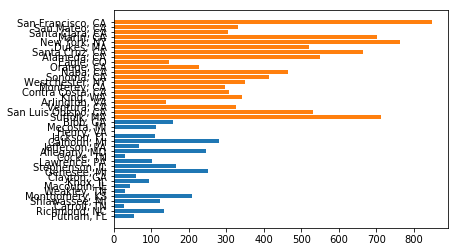

In [16]:
# Plot

plt.barh(bottom_MHP['County'], bottom_MHP['MHP Rate'])

plt.barh(top_MHP['County'], top_MHP['MHP Rate'])

In [17]:
# Run t-test
pop_top_MHP = top_MHP['MHP Rate']
pop_bottom_MHP = bottom_MHP['MHP Rate']
ttest_MHP = stats.ttest_ind(pop_top_MHP, pop_bottom_MHP, equal_var=False)

# Get p-value clean
if ttest_MHP[1] <0.001:
    pvalue_MHP = '{0:.1e}'.format(ttest_MHP[1])
else:
    pvalue_MHP = '{0:.3f}'.format(ttest_MHP[1])
pvalue_MHP

'5.5e-07'

# Multiplot

<BarContainer object of 40 artists>

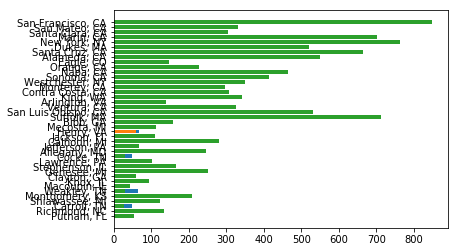

In [18]:
full_county_list = pd.merge(bottom_county_clean, top_county_clean, on='County', how='outer')
plt.barh(all_PCP['County'], all_PCP['PCP Rate'])
plt.barh(all_dentist['County'], all_dentist['Dentist Rate'])
plt.barh(all_MHP['County'], all_MHP['MHP Rate'])

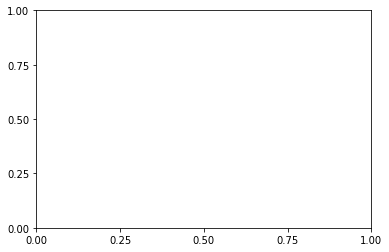

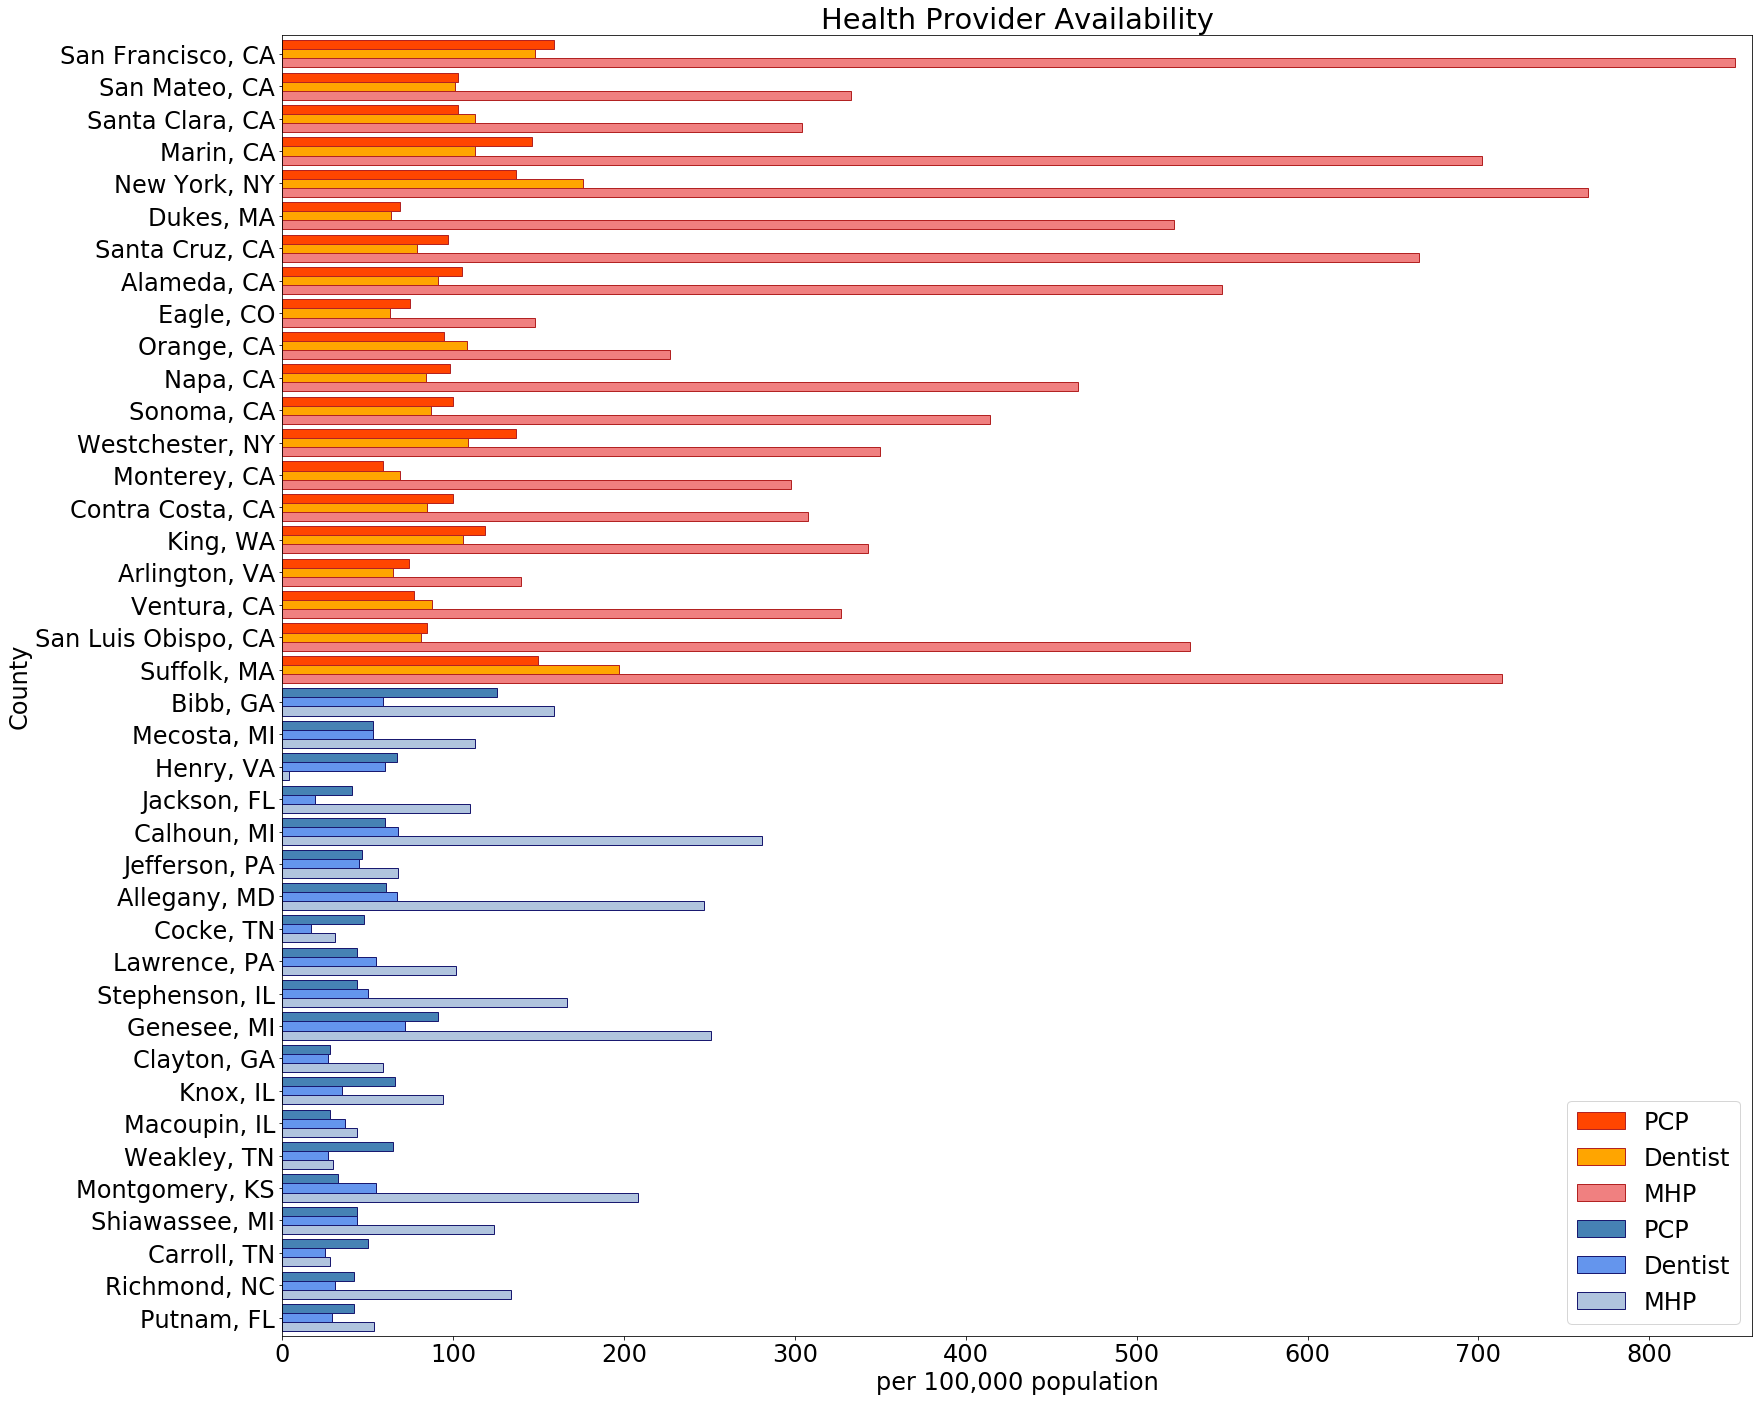

In [19]:
# data to plot
n_groups = 40
PCP_plot = (all_PCP['PCP Rate'])
dentist_plot = (all_dentist['Dentist Rate'])
MHP_plot = (all_MHP['MHP Rate'])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.28
 
plt.figure(figsize=(25,20))  
plt.rcParams.update({'font.size': 24})

mhp_plot = plt.barh(index, MHP_plot, bar_width,
                  alpha=1,
                  color=['lightsteelblue' for _ in range(20)]+['lightcoral' for _ in range(20)],
                  edgecolor=['midnightblue' for _ in range(20)]+['firebrick' for _ in range(20)],
                  label='MHP')

dentist_plot = plt.barh(index + bar_width, dentist_plot, bar_width,
                  alpha=1,
                  color=['cornflowerblue' for _ in range(20)]+['orange' for _ in range(20)],
                  edgecolor=['midnightblue' for _ in range(20)]+['firebrick' for _ in range(20)],
                  label='Dentist')

pcp_plot = plt.barh(index + 2*bar_width, PCP_plot, bar_width,
                  alpha=1,
                  color=['steelblue' for _ in range(20)]+['orangered' for _ in range(20)],
                  edgecolor=['midnightblue' for _ in range(20)]+['firebrick' for _ in range(20)],
                  label='PCP')


plt.ylabel('County')
plt.xlabel('per 100,000 population')
plt.title('Health Provider Availability')
plt.yticks(index + bar_width, (all_PCP['County']))

plt.legend((pcp_plot[20], dentist_plot[20], mhp_plot[20], pcp_plot, dentist_plot, mhp_plot), ("PCP", "Dentist", "MHP", "PCP", "Dentist", "MHP"))

plt.ylim(-0.28,39.87) 
plt.xlim(0,860)
      
plt.tight_layout()
# plt.show()
plt.savefig("Plots by median sale price/available_services_by_median_sale_price.png")

In [20]:
# # data to plot
# n_groups = 40
# means_frank = (90, 55, 40, 65, 6, 9, 45, 23, 76, 23, 87, 60, 50, 44, 4, 5, 23 ,56, 12, 65, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1 ,88)
# means_guido = (85, 62, 54, 20, 4, 5, 34, 56, 78 ,43, 90, 55, 40, 65, 6, 9, 45, 23, 76, 23, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1 ,44)
# means_bob = (87, 60, 50, 44, 4, 5, 23 ,56, 12, 65, 85, 62, 54, 20, 4, 5, 34, 56, 78 ,43, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,  9, 8, 7, 6, 5, 4, 3, 2, 1 ,22)
 
# # create plot
# fig, ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 0.2
# opacity = 0.8
 
# rects1 = plt.bar(index, means_frank, bar_width,
# alpha=opacity,
# color='r',
# label='Frank')
 
# rects2 = plt.bar(index + bar_width, means_guido, bar_width,
# alpha=opacity,
# color='g',
# label='Guido')

# rects3 = plt.bar(index + 2*bar_width, means_bob, bar_width,
# alpha=opacity,
# color='b',
# label='Bob')

# plt.xlabel('Person')
# plt.ylabel('Scores')
# plt.title('Scores by person')
# plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'e', 'f', 'g' ,'h', 'i', 'j', 'A', 'B', 'C', 'D', 'e', 'f', 'g' ,'h', 'i', 'j', 'A', 'B', 'C', 'D', 'e', 'f', 'g' ,'h', 'i', 'j', 'A', 'B', 'C', 'D', 'e', 'f', 'g' ,'h', 'i', 'j'))
# plt.legend()
 
    
# plt.figure(figsize=(70,60))    
# plt.tight_layout()
# # plt.show()

In [21]:
# N = 20

# ind = np.arange(N) 
# width = 0.15
# plt.bar(ind, pop_top_PCP, width, label='PCP', color='red')
# plt.bar(ind + width, pop_top_dentist, width,
#     label='Dentist', color='orange')
# plt.bar(ind + 2*width, pop_top_MHP, width,
#     label='MHP', color='yellow')



# plt.ylabel('County')
# plt.xlabel('per 100,000 population')
# plt.title('Health Provider Availability')

# plt.yticks(ind + width + width / 2 , full_county_list['County'])
# plt.legend(loc='best')
# plt.show()

In [22]:

# N = 5
# men_means = (20, 35, 30, 35, 27)
# women_means = (25, 32, 34, 20, 25)

# ind = np.arange(N) 
# width = 0.35       
# plt.bar(ind, men_means, width, label='Men')
# plt.bar(ind + width, women_means, width,
#     label='Women')

# plt.ylabel('Scores')
# plt.title('Scores by group and gender')

# plt.xticks(ind + width / 2, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.legend(loc='best')
# plt.show()